In [1]:
# 데이터 시각화
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

# 비지도학습
- Target이 없는 데이터를 분류하기
- 군집화, 차원축소가 있음

---
### 군집 알고리즘

- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 3분류하기

In [2]:
import numpy as np

In [3]:
fruits = np.load('../data/fruits.npy')
fruits.shape

(300, 100, 100)

> 흑백이미지   
> 300개의 이미지가 100 * 100 픽셀로 구성   
> 100개는 사과, 100개는 파인애플, 100개는 바나나

In [5]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

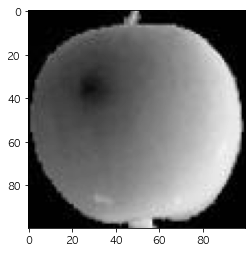

In [20]:
# 사과 이미지 보기 : 이미지로 확인하기
plt.imshow(fruits[1], cmap='gray')

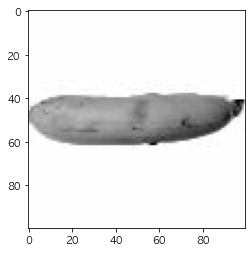

In [26]:
# 사과 이미지 보기 : 이미지로 확인하기
plt.imshow(fruits[201], cmap='gray_r')

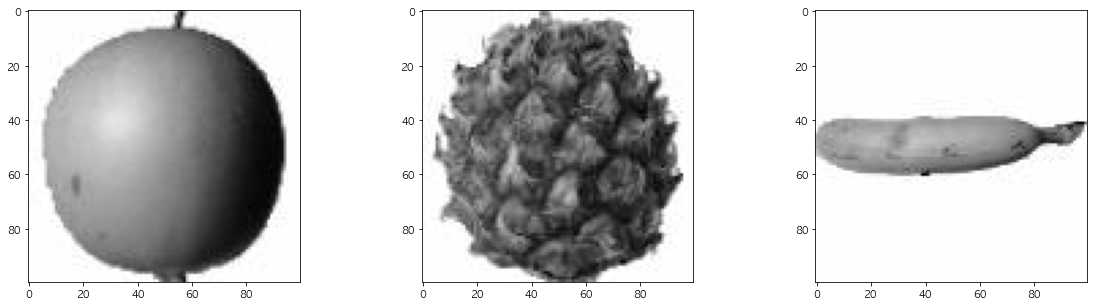

In [29]:
# 사과, 파인애플, 바나나 이미지를 나란히 보기
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')

plt.show()

### 샘플 차원 변경하기
- 현재 3차원의 배열을 분석을 위해 2차원 배열로 변경
- 배열 중 page단의 수를 apple, pineapple, banana로 분류하게 변경하기

In [30]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [31]:
apple.shape

(100, 10000)

In [37]:
(apple[0:1])

array([[1, 1, 1, ..., 1, 1, 1]], dtype=int32)

> 사과 이미지는 비슷하니깐 행들의 평균값도 비슷하지 않을까?

### 픽셀값 분석하기

In [39]:
# apple의 sample별 평균 구하기
apple.mean(axis=1)

array([ 88.4588,  98.0594,  87.4831,  98.4898,  92.9991,  82.7579,
        94.536 ,  95.7095,  90.7508,  81.7788,  87.1803,  95.2125,
        93.9517,  87.1466,  97.6411,  87.3593,  89.0571, 101.0366,
        92.8971, 101.0462, 105.0824,  88.7961,  99.6585,  97.359 ,
        94.2293,  92.2932,  95.2592,  93.4393, 103.0312,  94.7767,
        90.6388,  89.1673,  97.8923,  97.4053, 100.8732,  90.6799,
       100.3753,  85.9834,  96.5866,  97.2989,  90.8155, 102.4502,
        87.3238,  89.9929,  86.8717,  86.4904,  95.3862,  89.289 ,
        96.9175,  91.782 ,  96.2412,  99.7925,  95.1062,  87.5648,
        89.3416,  89.6668,  93.9096,  97.5639,  87.2779,  97.9526,
       103.3378,  94.5728,  83.8009,  83.6077, 102.9481,  87.1496,
        91.3842, 100.5921,  93.9603,  90.9806,  97.5707,  97.574 ,
        82.5605,  87.2897,  97.0628,  90.4258,  90.6506,  97.741 ,
        98.1869,  93.7264,  87.536 ,  84.8565,  89.2303,  86.8919,
        88.8434,  86.7783,  96.8703,  97.3682,  82.0917,  87.3

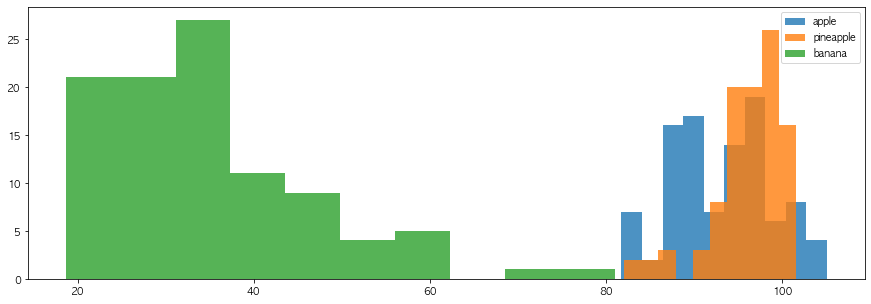

In [46]:
# 과일별(Sample별) 빈도수를 히스토그램으로 표현하기
plt.figure(figsize=(15,5))

plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])

plt.show()

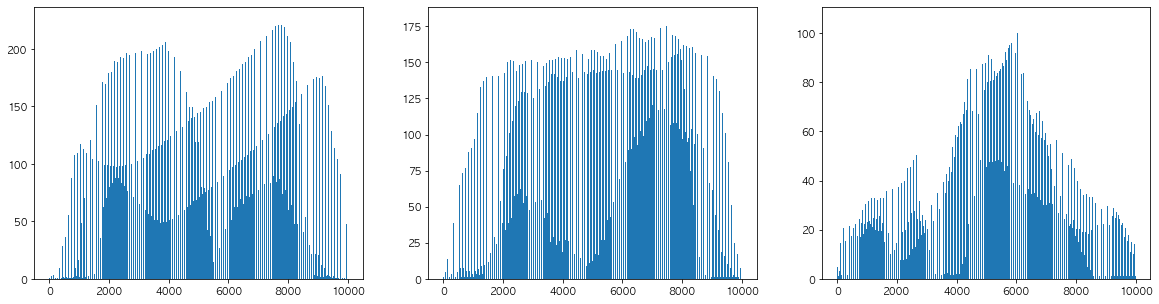

In [48]:
# Feature 픽셀별 평균의 막대그래프 그리기
fig, axs = plt.subplots(1,3,figsize=(20,5))

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()

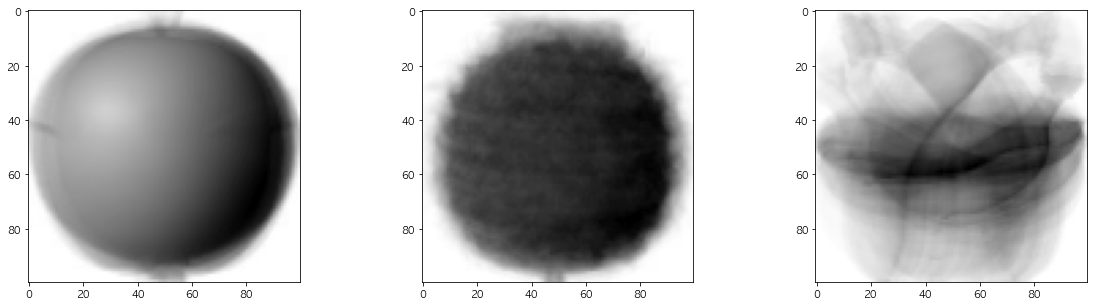

In [49]:
# 평균 이미지로 그림 표현하기 : 이미지로 그리기 위해 다시 2차원 배열로 변경하기
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하면, 가장 가까운 거리의 이미지는 해당 과일일 것이다.

In [52]:
abs_diff = np.abs(fruits - apple_mean) # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이므로 page차원을 제외하고 행과 열만의 평균을 구하겠다.
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열

(300,)

> abs_mean과 apple의 차이가 가장 적은 것으로 구분

In [54]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서, 해당 이미지를 불러오기 위한 index가 필요하다. (arg.sort)
apple_index = np.argsort(abs_mean)[:100]

In [55]:
apple_index

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 30,
       68, 66, 24, 76, 15, 98, 84, 47, 90,  3, 94, 23, 32, 53, 71, 14,  7,
       73, 36, 77, 55, 21, 10, 39, 17, 99, 11, 35, 65, 95,  6, 61, 56, 22,
       89,  2, 13, 80,  0, 97,  4, 58, 40, 75, 43, 34, 82, 16, 54, 31, 49,
       93, 37, 63, 64, 41, 28, 25, 96, 67,  8, 83, 46, 19, 79, 72,  5, 85,
       20, 29, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

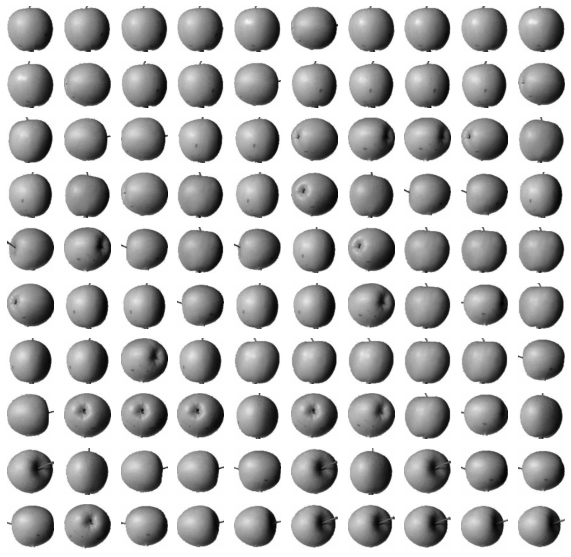

In [60]:
# 그림 그려보기
fig, axs = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')

plt.show()

> 이와 같은 방법으로 비지도하습인 군집분류 알고리즘이 구성된다.

---
### 바나나 확인

In [65]:
abs_diff = np.abs(fruits - banana_mean) # 양수와 음수의 구분이 필요 없으므로 절대값 사용
abs_mean = np.mean(abs_diff, axis=(1,2)) # abs_diff가 3차원이므로 page차원을 제외하고 행과 열만의 평균을 구하겠다.
abs_mean.shape # 300개의 원소로 이루어진 1차원 배열

(300,)

In [76]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서, 해당 이미지를 불러오기 위한 index가 필요하다. (arg.sort)
banana_index = np.argsort(abs_mean)[:98]
banana_index

array([285, 212, 291, 261, 208, 286, 284, 265, 219, 276, 264, 290, 283,
       252, 255, 203, 266, 200, 201, 269, 247, 256, 281, 270, 211, 254,
       268, 239, 299, 225, 250, 275, 280, 232, 246, 205, 244, 263, 297,
       224, 279, 262, 238, 288, 289, 287, 218, 245, 217, 230, 274, 295,
       209, 220, 213, 267, 237, 229, 248, 278, 204, 243, 228, 206, 207,
       272, 241, 210, 214, 233, 222, 235, 277, 253, 294, 282, 240, 271,
       296, 249, 215, 258, 259, 227, 202, 236, 293, 260, 226, 216, 292,
       257, 221, 298, 251, 223, 242, 231])

IndexError: index 98 is out of bounds for axis 0 with size 98

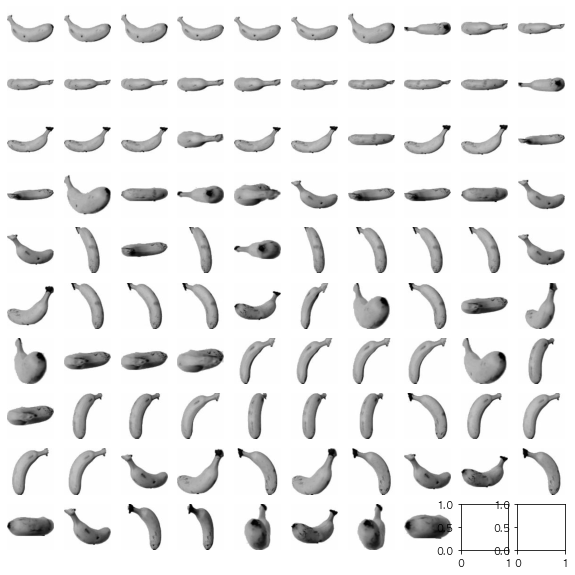

In [77]:
# 그림 그려보기
fig, axs = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')

plt.show()